**Sales Prediction for Big Mart Outlets**


The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


plt.rcParams['figure.figsize']=[15,6]

import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('Bigmart_Train.csv')
train.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Cat,ItemID_Cat,Outlet_Perf,Existence_Yr
0,9.30,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,Perishables,FD,Medium_Perf,14
1,5.92,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,Non_Perishables,DR,Medium_Perf,4


In [3]:
test=pd.read_csv('Bigmart_Test.csv')
test.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Cat,ItemID_Cat,Outlet_Perf,Existence_Yr
0,20.75,Low Fat,0.007565,107.8622,Medium,Tier 1,Supermarket Type1,Non_Perishables,FD,Medium_Perf,14
1,8.30,Regular,0.038428,87.3198,Small,Tier 2,Supermarket Type1,Perishables,FD,Medium_Perf,6


In [4]:
train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Cat,ItemID_Cat,Outlet_Perf,Existence_Yr
0,9.300,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,Perishables,FD,Medium_Perf,14
1,5.920,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,Non_Perishables,DR,Medium_Perf,4
2,17.500,Low Fat,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,Perishables,FD,Medium_Perf,14
3,19.200,Regular,0.022914,182.0950,Small,Tier 3,Grocery Store,732.3800,Perishables,FD,Low_Perf,15
4,8.930,Non Edible,0.013177,53.8614,High,Tier 3,Supermarket Type1,994.7052,Non_Perishables,NC,High_Perf,26
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,214.5218,High,Tier 3,Supermarket Type1,2778.3834,Non_Perishables,FD,High_Perf,26
8519,8.380,Regular,0.046982,108.1570,Medium,Tier 2,Supermarket Type1,549.2850,Non_Perishables,FD,Medium_Perf,11
8520,10.600,Non Edible,0.035186,85.1224,Small,Tier 2,Supermarket Type1,1193.1136,Non_Perishables,NC,Medium_Perf,9
8521,7.210,Regular,0.145221,103.1332,Medium,Tier 3,Supermarket Type2,1845.5976,Non_Perishables,FD,Medium_Perf,4


# Objective

* Sklearn models - Submit it on the website


* Feature selection- SFS and RFE


* Cross validation works


* Bias and Variance concept


* Regularization


* Grid search CV

In [4]:
# Linear regression  model


In [5]:
train.Outlet_Size.unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [4]:
dict_outlet={'Small':1,'Medium':2,'High':3}

In [5]:
train['Outlet_Size']=train.Outlet_Size.map(dict_outlet)

In [6]:
test['Outlet_Size']=test.Outlet_Size.map(dict_outlet)

In [7]:
train.Outlet_Location_Type.unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [8]:
Outlet_loc_dict={'Tier 1':3,'Tier 2':2,'Tier 3':1}

In [9]:
train['Outlet_Location_Type']=train.Outlet_Location_Type.map(Outlet_loc_dict)

In [10]:
test['Outlet_Location_Type']=test.Outlet_Location_Type.map(Outlet_loc_dict)

In [11]:
train.Outlet_Perf.unique()

array(['Medium_Perf', 'Low_Perf', 'High_Perf'], dtype=object)

In [12]:
dict_perf={'Medium_Perf':2, 'Low_Perf':1, 'High_Perf':3}

In [13]:
train['Outlet_Perf']=train.Outlet_Perf.map(dict_perf)

In [14]:
test['Outlet_Perf']=test.Outlet_Perf.map(dict_perf)

In [15]:
train.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Cat,ItemID_Cat,Outlet_Perf,Existence_Yr
0,9.30,Low Fat,0.016047,249.8092,2,3,Supermarket Type1,3735.1380,Perishables,FD,2,14
1,5.92,Regular,0.019278,48.2692,2,1,Supermarket Type2,443.4228,Non_Perishables,DR,2,4


In [16]:
#pd.get_dummies
dummy_train=pd.get_dummies(train,drop_first=True)

In [17]:
dummy_test=pd.get_dummies(test,drop_first=True)

In [18]:
(dummy_train.shape,dummy_test.shape)

((8523, 16), (5681, 15))

In [19]:
#model building

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [20]:
lr=LinearRegression()

In [21]:
x=dummy_train.drop('Item_Outlet_Sales',axis=1)
y=dummy_train.Item_Outlet_Sales
pred=lr.fit(x,y).predict(dummy_test)

In [63]:
#prepare the submission file
sub=pd.read_csv('Submission.csv')
sub.head(2)

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000


In [78]:
sub['Item_Outlet_Sales']=np.abs(pred)

In [75]:
sub

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1810.091542
1,FDW14,OUT017,1620.028322
2,NCN55,OUT010,1884.366435
3,FDQ58,OUT017,2623.636191
4,FDY38,OUT027,5193.317299
...,...,...,...
5676,FDB58,OUT046,2346.263551
5677,FDD47,OUT018,2435.227878
5678,NCO17,OUT045,1840.290121
5679,FDJ26,OUT017,3578.037834


In [80]:
#export the data
sub.to_csv('LRMODEL',index=False)

In [81]:
cd

C:\Users\Ashwin


In [83]:

from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
pred=rf.fit(x,y).predict(dummy_test)

In [88]:
sub.to_csv('rf.csv',index=False)

### Feature selection

* Sequential feature selector


* Recursive feature elimination


* lets build the data in train and test


* build a statestical model and check the p values to the signif feat


* bring the sfs and rfe

In [89]:
from sklearn.model_selection import train_test_split

In [91]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [90]:
import statsmodels.api as sma

In [92]:
temp_train=sma.add_constant(xtrain)

model=sma.OLS(ytrain,temp_train).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     625.3
Date:                Wed, 09 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:12:07   Log-Likelihood:                -57591.
No. Observations:                6818   AIC:                         1.152e+05
Df Residuals:                    6803   BIC:                         1.153e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -2262.4149    208.976    -10.826      0.000   -2672.072   -1852.757
Item_Weight                      -1.6263      2.956     -0.550      0.582      -7.421       4.169
Item_Visibility                -192.7715    287.165     -0.671      0.502    -755.704     370.161
Item_MRP                         15.5379      0.219     70.807      0.000      15.108      15.968
Outlet_Size                     -25.1677     39.934     -0.630      0.529    -103.451      53.115
Outlet_Location_Type            209.7639     76.892      2.728      0.006      59.032     360.495
Outlet_Perf                     800.4936    264.035      3.032      0.002     282.902    1318.085
Existence_Yr                    -34.9406     11.354     -3.077      0.002     -57.199     -12.682
Item_Fat_Content_Non Edible      -1.8962     28.157     -0.067      0.946     -57.093      53.301
Item_Fat_Content_Regular         34.6136     31.558      1.097      0.273     -27.251      96.478
Outlet_Type_Supermarket Type1   724.5791    411.547      1.761      0.078     -82.181    1531.340
Outlet_Type_Supermarket Type2   440.7998    395.835      1.114      0.265    -335.161    1216.760
Outlet_Type_Supermarket Type3  2203.4894    393.528      5.599      0.000    1432.051    2974.927
Item_Type_Cat_Perishables       -16.5628     31.437     -0.527      0.598     -78.188      45.063
ItemID_Cat_FD                    31.8162     50.600      0.629      0.530     -67.375     131.008
ItemID_Cat_NC                    -1.8962     28.157     -0.067      0.946     -57.093      53.301
==============================================================================
Omnibus:                      825.427   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2044.750
Skew:                           0.698   Prob(JB):                         0.00
Kurtosis:                       5.291   Cond. No.                     2.03e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.97e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<AxesSubplot:>

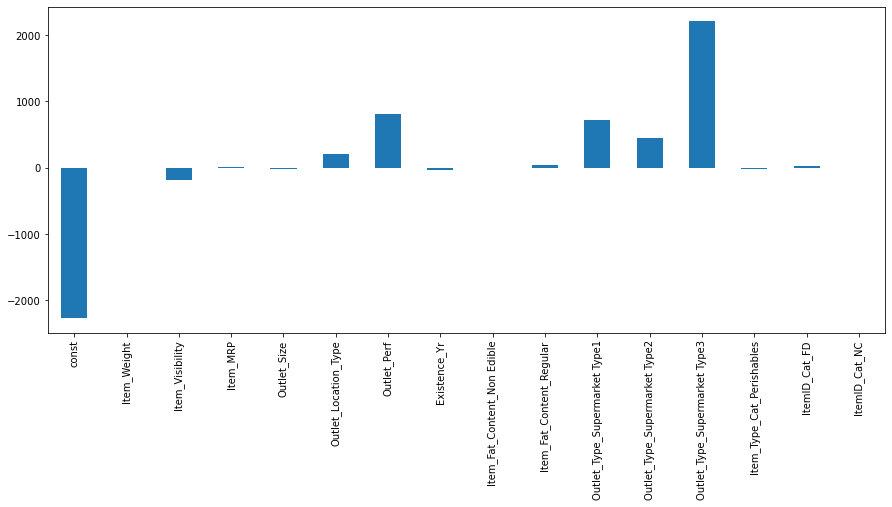

In [169]:
model.params.plot(kind='bar')

In [93]:
from sklearn.metrics import mean_squared_error

In [98]:
temp_test=sma.add_constant(xtest)
pred=model.predict(temp_test)
rmse=np.sqrt(mean_squared_error(ytest,pred))
rmse

1130.5127334746635

In [137]:
cols=['Model_Name','R_Squared','RMSE']
df=pd.DataFrame(columns=cols)

model_stats=pd.Series({'Model_Name':'Linear Regression','R_Squared':model.rsquared,'RMSE':rmse})

result=result.append(model_stats,ignore_index=True)

result

,Model_Name,R_Squared,RMSE
0,sfs,0.830671,1141.960668
1,rfe,0.743368,1417.051116
2,sfs,0.830671,1141.960668
3,Linear Regression,0.562702,1130.512733


#  Sequential feature selector

In [105]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [106]:
lr=LinearRegression()

sfs=SequentialFeatureSelector(estimator=lr,k_features='best',forward=True,scoring='neg_mean_squared_error')

In [107]:
sfs.fit(x,y)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(1, 15),
                          scoring='neg_mean_squared_error')

In [108]:
sfs.k_feature_names_

('Item_MRP',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Perf',
 'Existence_Yr',
 'Item_Fat_Content_Regular',
 'Outlet_Type_Supermarket Type1',
 'Outlet_Type_Supermarket Type2',
 'Outlet_Type_Supermarket Type3')

In [109]:
sfs_feat=xtrain.loc[:,sfs.k_feature_names_]
sfs_test=xtest.loc[:,sfs.k_feature_names_]

In [113]:

#build the model



sfsmodel=sma.OLS(ytrain,sfs_feat).fit()

In [112]:
sfsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.831
Model:                            OLS   Adj. R-squared (uncentered):              0.830
Method:                 Least Squares   F-statistic:                              3711.
Date:                Wed, 09 Nov 2022   Prob (F-statistic):                        0.00
Time:                        12:54:22   Log-Likelihood:                         -57656.
No. Observations:                6818   AIC:                                  1.153e+05
Df Residuals:                    6809   BIC:                                  1.154e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Item_MRP                         15.1351      0.218     69.380      0.000      14.707      15.563
Outlet_Size                     -67.2223     40.125     -1.675      0.094    -145.879      11.435
Outlet_Location_Type           -599.4627     30.378    -19.733      0.000    -659.014    -539.912
Outlet_Perf                   -1932.3670    113.182    -17.073      0.000   -2154.239   -1710.495
Existence_Yr                     69.5844      6.791     10.246      0.000      56.271      82.898
Item_Fat_Content_Regular         33.0899     28.831      1.148      0.251     -23.429      89.609
Outlet_Type_Supermarket Type1  4818.7733    205.596     23.438      0.000    4415.741    5221.806
Outlet_Type_Supermarket Type2  4159.8961    228.310     18.220      0.000    3712.338    4607.455
Outlet_Type_Supermarket Type3  6147.0523    192.207     31.981      0.000    5770.267    6523.838
==============================================================================
Omnibus:                      875.534   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2131.305
Skew:                           0.741   Prob(JB):                         0.00
Kurtosis:                       5.303   Cond. No.                     4.15e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [114]:
pred=sfsmodel.predict(sfs_test)

sfs_rmse=np.sqrt(mean_squared_error(ytest,pred))

In [115]:
sfs_rmse

1141.9606676586984

In [135]:
#cols=['Model_Name','R_Squared','RMSE']
#df=pd.DataFrame(columns=cols)

model_stats=pd.Series({'Model_Name':'sfs','R_Squared':sfsmodel.rsquared,'RMSE':sfs_rmse})

result=result.append(model_stats,ignore_index=True)

result

,Model_Name,R_Squared,RMSE
0,sfs,0.830671,1141.960668
1,rfe,0.743368,1417.051116
2,sfs,0.830671,1141.960668


In [120]:
from sklearn.feature_selection import RFE

lr=LinearRegression()

rfe=RFE(estimator=lr,n_features_to_select=5)

In [121]:
rfe.fit(x,y)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [122]:
pd.Series(rfe.ranking_,index=x.columns).sort_values(ascending=False)

Item_Weight                      11
Item_Fat_Content_Non Edible      10
ItemID_Cat_NC                     9
Item_Type_Cat_Perishables         8
Item_MRP                          7
Existence_Yr                      6
Outlet_Location_Type              5
Item_Fat_Content_Regular          4
Outlet_Size                       3
Outlet_Perf                       2
Item_Visibility                   1
Outlet_Type_Supermarket Type1     1
Outlet_Type_Supermarket Type2     1
Outlet_Type_Supermarket Type3     1
ItemID_Cat_FD                     1
dtype: int32

In [126]:
feats=pd.Series(rfe.ranking_,index=x.columns).sort_values(ascending=False)[:5].index

In [127]:
rfe_feat=xtrain.loc[:,feats]
rfe_test=xtest.loc[:,feats]

In [128]:
rfemodel=sma.OLS(ytrain,rfe_feat).fit()
pred=rfemodel.predict(rfe_test)

rmse_rfe=np.sqrt(mean_squared_error(ytest,pred))

In [129]:
rmse_rfe

1417.0511155390593

In [131]:
model_stats=pd.Series({'Model_Name':'rfe','R_Squared':rfemodel.rsquared,'RMSE':rmse_rfe})

result=result.append(model_stats,ignore_index=True)

result

,Model_Name,R_Squared,RMSE
0,sfs,0.830671,1141.960668
1,sfs,0.743368,1417.051116
2,rfe,0.743368,1417.051116


In [139]:
result

,Model_Name,R_Squared,RMSE
0,sfs,0.830671,1141.960668
1,rfe,0.743368,1417.051116
2,sfs,0.830671,1141.960668
3,Linear Regression,0.562702,1130.512733


### K fold cross validation model

In [141]:
from sklearn.model_selection import KFold

In [142]:
from sklearn.metrics import r2_score

In [149]:
kf=KFold(n_splits=5,shuffle=True,random_state=0)


lr=LinearRegression()
predictions=[]

for train_index,test_index in kf.split(x,y):
    #print(train_index,test_index)
    kf_xtrain=x.loc[train_index]
    kf_xtest=x.loc[test_index]
    kf_ytrain=y.loc[train_index]
    kf_ytest=y.loc[test_index]
    
    #print(kf_xtrain.shape,kf_ytrain.shape,kf_xtest.shape,kf_ytest.shape)
    
    predictions.append(lr.fit(kf_xtrain,kf_ytrain).predict(dummy_test))

In [154]:
pred=pd.DataFrame(predictions).T.mean(axis=1)

In [158]:
#submission

sub['Item_Outlet_Sales']=np.abs(pred)

sub.to_csv('KFOLDMODEL.csv',index=False)

In [159]:
cd

C:\Users\Ashwin


In [160]:
#random forest
kf=KFold(n_splits=5,shuffle=True,random_state=0)


lr=RandomForestRegressor()
predictions=[]

for train_index,test_index in kf.split(x,y):
    #print(train_index,test_index)
    kf_xtrain=x.loc[train_index]
    kf_xtest=x.loc[test_index]
    kf_ytrain=y.loc[train_index]
    kf_ytest=y.loc[test_index]
    
    #print(kf_xtrain.shape,kf_ytrain.shape,kf_xtest.shape,kf_ytest.shape)
    
    predictions.append(lr.fit(kf_xtrain,kf_ytrain).predict(dummy_test))

In [161]:
pred=pd.DataFrame(predictions).T.mean(axis=1)

In [162]:
#submission

sub['Item_Outlet_Sales']=np.abs(pred)

sub.to_csv('KFOLDMODEL_rsf.csv',index=False)

In [166]:
kf=KFold(n_splits=10,shuffle=True,random_state=0)


lr=RandomForestRegressor()
predictions=[]

for train_index,test_index in kf.split(x,y):
    #print(train_index,test_index)
    kf_xtrain=x.loc[train_index]
    kf_xtest=x.loc[test_index]
    kf_ytrain=y.loc[train_index]
    kf_ytest=y.loc[test_index]
    
    #print(kf_xtrain.shape,kf_ytrain.shape,kf_xtest.shape,kf_ytest.shape)
    
    predictions.append(lr.fit(kf_xtrain,kf_ytrain).predict(dummy_test))

In [167]:
pred=pd.DataFrame(predictions).T.mean(axis=1)

In [168]:
#submission

sub['Item_Outlet_Sales']=np.abs(pred)

sub.to_csv('KFOLDMODEL100_rsf.csv',index=False)

# Day 3

<AxesSubplot:>

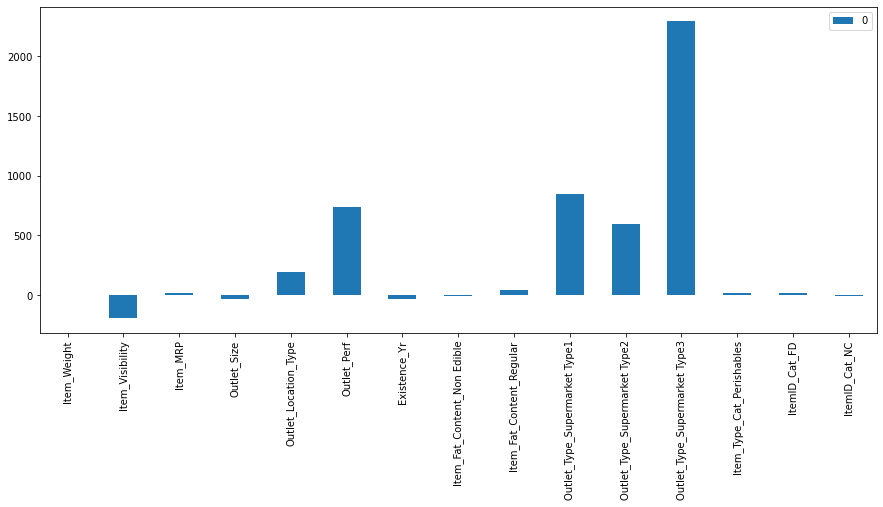

In [22]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet
ridge=Ridge()
lasso=Lasso()
enet=ElasticNet()
pred_ridge=ridge.fit(x,y).predict(dummy_test)
pd.DataFrame(lr.coef_,x.columns).plot(kind='bar')

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
ridge=()
params=({'alpha':[0.1,0.5,0.9,1,2,3,5,7,8,9,10]})
grid=GridSearchCV(estimator=ridge ,param_grid=params ,cv=5)

In [25]:
#pass the grid search on the data

#optuna , genetic algorithm

grid.fit(x,y)

TypeError: not enough arguments for format string

In [26]:
#build the final model for submission

ridge=Ridge(alpha=0.1,normalize=True)

finalpred=ridge.fit(x,y).predict(dummy_test)

sub=pd.read_csv('Submission.csv')


In [28]:
sub['Item_Outlet_Sales']=np.abs(finalpred)

In [29]:
sub

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1836.868568
1,FDW14,OUT017,1670.323792
2,NCN55,OUT010,1974.906904
3,FDQ58,OUT017,2589.628955
4,FDY38,OUT027,4891.462773
...,...,...,...
5676,FDB58,OUT046,2312.515771
5677,FDD47,OUT018,2342.662441
5678,NCO17,OUT045,1829.728839
5679,FDJ26,OUT017,3425.125525


In [31]:
sub.to_csv('new_sub.csv',index=False)

In [49]:
cd

C:\Users\Ashwin


In [32]:
#elastic net model

enet=ElasticNet(normalize=True)

finalpred=enet.fit(x,y).predict(dummy_test)

sub['Item_Outlet_Sales']=finalpred

sub.to_csv('enet.csv',index=False)

In [33]:
#tuning

estimator=enet

params=({'l1_ratio':[0.1,0.01,0.001,0.2,0.02,0.8,0.9,0.25,0.0025]})

grid=GridSearchCV(estimator=enet,param_grid=params,cv=5)

grid.fit(x,y)

GridSearchCV(cv=5, estimator=ElasticNet(normalize=True),
             param_grid={'l1_ratio': [0.1, 0.01, 0.001, 0.2, 0.02, 0.8, 0.9,
                                      0.25, 0.0025]})

In [35]:
grid.best_params_

{'l1_ratio': 0.9}

In [36]:

enet=ElasticNet(l1_ratio=0.9,normalize=True)

In [37]:
finalpred=enet.fit(x,y).predict(dummy_test)

Rmse=1772

In [38]:
#stochastic gradient descnet model

from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor()

In [39]:
finalpred=sgd.fit(x,y).predict(dummy_test)

In [41]:
sub['Item_Outlet_Sales']=abs(finalpred)
sub.to_csv('sgdd.csv',index=False)

In [42]:
#gradient boosting

from sklearn.ensemble import GradientBoostingRegressor

gbm=GradientBoostingRegressor()

In [43]:
finalpred=gbm.fit(x,y).predict(dummy_test)


In [46]:
estimator=gbm

params=({'loss':['squared_error','huber','epsilon_insensitive','squared_epsilon_insensitive'],
       'penalty':['l1','l2','elasticnet'],
       'l1_ratio':[0.1,0.01,0.001,0.2,0.02,0.8,0.9,0.25,0.0025],
       'alpha':[0.1,0.5,0.9,1,2,3,5,7,8,9,10]})

In [48]:
#grid=GridSearchCV(estimator=sgd,param_grid=params,cv=5)
#grid.fit(x,y)
#print(grid.best_params)

In [49]:
sgd=SGDRegressor(alpha=0.1,l1_ratio=0.00258,loss='epsilon_insensitive',penalty='l1')

In [50]:
final_pred=sgd.fit(x,y).predict(dummy_test)

In [51]:
sub['Item_Outlet_Sales']=final_pred

In [52]:
sub.to_csv('tuned_sgd.csv',index=False)